# Red Wine Quality Prediction

Problem Statement: The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model.

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
!pip install xgboost

     |████████████████████████████████| 790 kB 1.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/nidhinathkatiyar/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/8x/zs7hyd_n4wg4b8t0z59wfgw40000gn/T/pip-install-ghhaoe66/xgboost_e547eee6b20543d9b90cd70ad20d90fb/setup.py'"'"'; __file__='"'"'/private/var/folders/8x/zs7hyd_n4wg4b8t0z59wfgw40000gn/T/pip-install-ghhaoe66/xgboost_e547eee6b20543d9b90cd70ad20d90fb/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/8x/zs7hyd_n4wg4b8t0z59wfgw40000gn/T/pip-wheel-r_18fdew
       cwd: /private/var/folders/8x/zs7hyd_n4wg4b8t0z59wfgw40000gn/T/pip-install-ghhaoe66/xgboost_e547eee6b20543d9b90cd70ad

In [2]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine.shape

(1599, 12)

In [6]:
type(wine)

pandas.core.frame.DataFrame

In [7]:
wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
959,8.0,0.59,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,5


In [8]:
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# About the Columns :-

1.fixed acidity
2.volatile acidity
3.citric acid
4.residual sugar
5.chlorides
6.free sulfur dioxide
7.total sulfur dioxide
8.density
9.pH
10.sulphates
11.alcohol
12.quality

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
wine['quality'].unique()

#This is a classification problem since the target variable/label column has categorical type of data.

array([5, 6, 7, 4, 8, 3])

In [14]:
# Checking the '0' values in the dataset

(wine==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

# EDA (Exploratory Data Analysis)

Scatterplot:

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

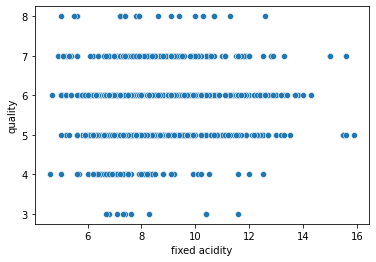

In [15]:
sns.scatterplot()
sns.scatterplot(x="fixed acidity", y="quality", data= wine)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

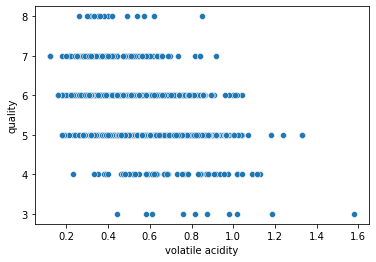

In [16]:
sns.scatterplot(x="volatile acidity", y="quality", data= wine)


<AxesSubplot:xlabel='citric acid', ylabel='quality'>

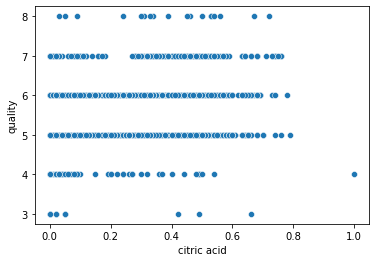

In [17]:
sns.scatterplot(x="citric acid", y="quality", data= wine)


<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

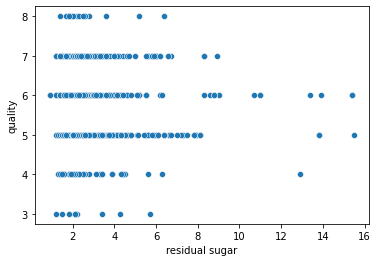

In [18]:
sns.scatterplot(x="residual sugar", y="quality", data= wine)


<AxesSubplot:xlabel='chlorides', ylabel='quality'>

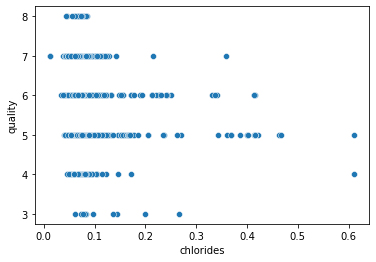

In [19]:
sns.scatterplot(x="chlorides", y="quality", data= wine)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

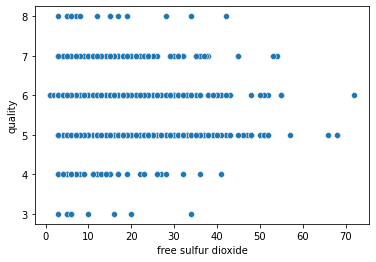

In [20]:
sns.scatterplot(x="free sulfur dioxide", y="quality", data= wine)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

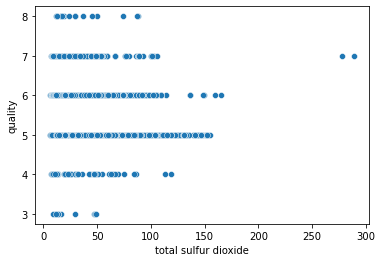

In [21]:
sns.scatterplot(x="total sulfur dioxide", y="quality", data= wine)


<AxesSubplot:xlabel='density', ylabel='quality'>

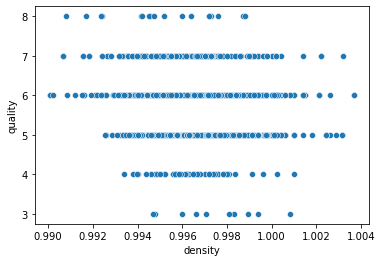

In [22]:
sns.scatterplot(x="density", y="quality", data= wine)


<AxesSubplot:xlabel='pH', ylabel='quality'>

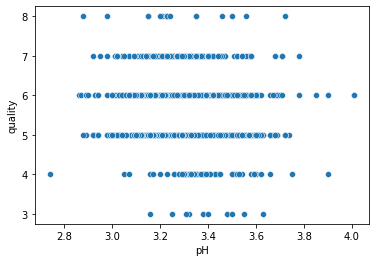

In [23]:
sns.scatterplot(x="pH", y="quality", data= wine)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

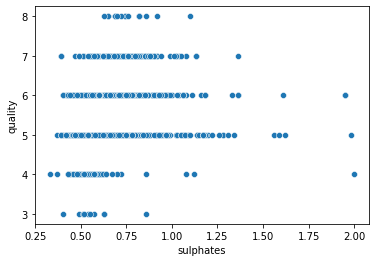

In [24]:
sns.scatterplot(x="sulphates", y="quality", data= wine)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

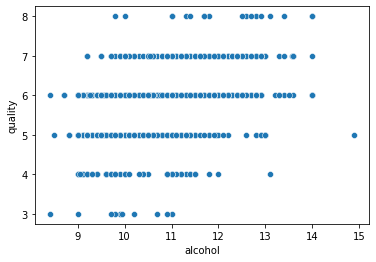

In [25]:
sns.scatterplot(x="alcohol", y="quality", data= wine)

In [27]:
sns.pairplot(wine)
plt.show()

KeyboardInterrupt: 

In [28]:
# Checking relationship between Dependent and Independent variables
x = wine.drop(columns = ['quality'])
y = wine['quality']

<AxesSubplot:xlabel='quality', ylabel='count'>

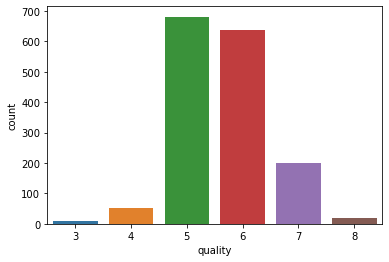

In [29]:
# Checking for class imbalance

sns.countplot(wine['quality'])

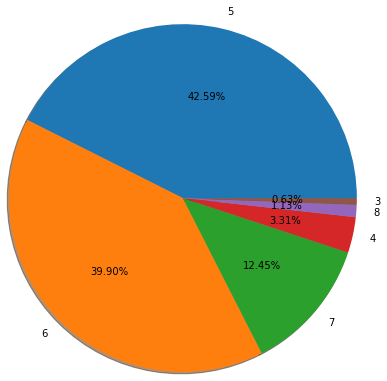

In [30]:
labels = '5','6','7','4','8','3'

fig, ax = plt.subplots()

ax.pie(wine['quality'].value_counts(),labels = labels,radius = 2, autopct = '%1.2f%%', shadow = True)

plt.show()

# using above chart and graph we can understand that all values falls under 5 or below 5 those are in not good category however for those falling grater than 5 is "Good" category.

Good is encoding with '1' and not good '0'

In [31]:
wine['quality'] = np.where((wine['quality'] <=5),0,1)
wine['quality'].unique()

array([0, 1])

<AxesSubplot:xlabel='quality', ylabel='count'>

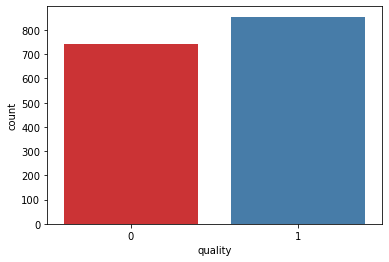

In [32]:
sns.countplot(wine['quality'], palette = "Set1")

-Class '1' has 6.94% more values than class'0', now there is not any substantial inbalance in data distribution between the 2 classes.

# Data Visualization

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

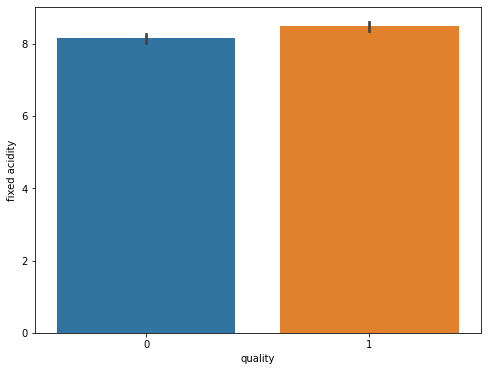

In [33]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

we observed fixed acidity does not give any specification to classify the quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

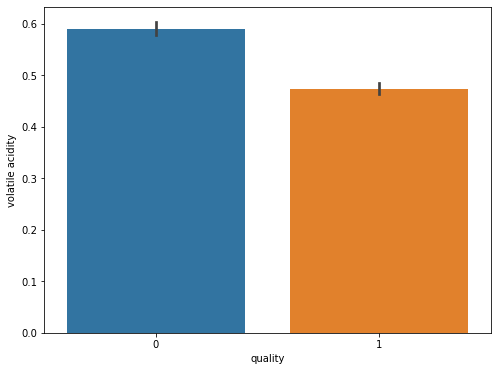

In [34]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

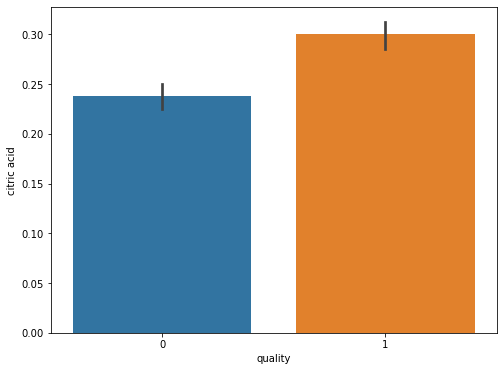

In [35]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

#citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

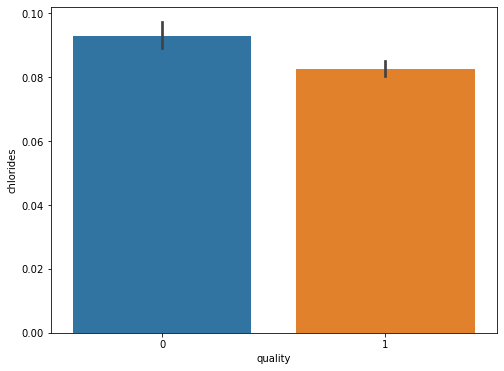

In [36]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

# Composition of chloride also go down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

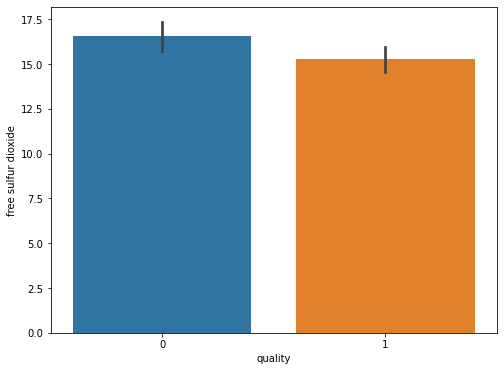

In [37]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

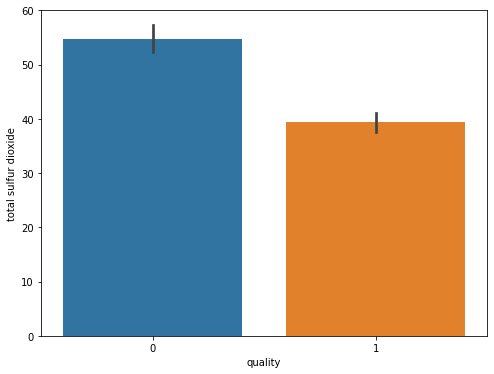

In [38]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

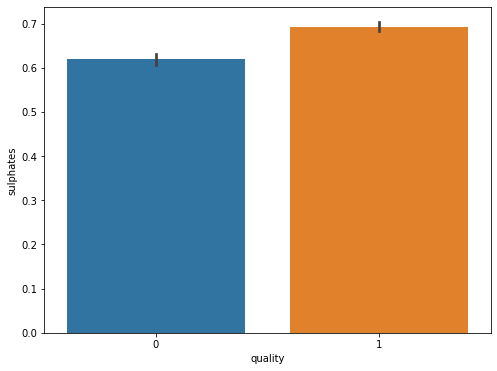

In [39]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

Sulphates level goes higher with the quality of wine

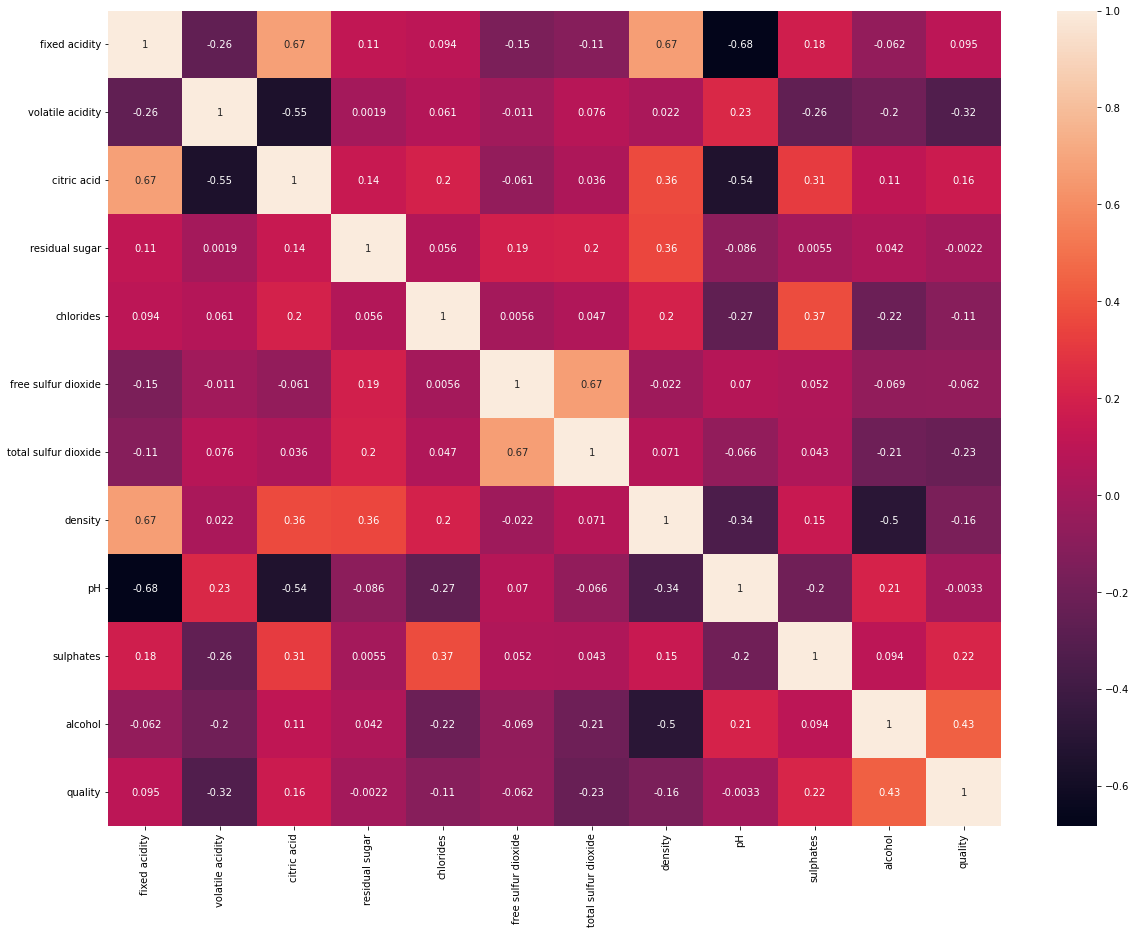

In [40]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(wine.corr(),annot = True)
plt.show()

-Feature like 'Alcohol','Sulphates' have a good positive correlation with 'quality' while 'volatile acidity' 'total sulfur dioxide' have a significiant negative correlation with 'quality'.

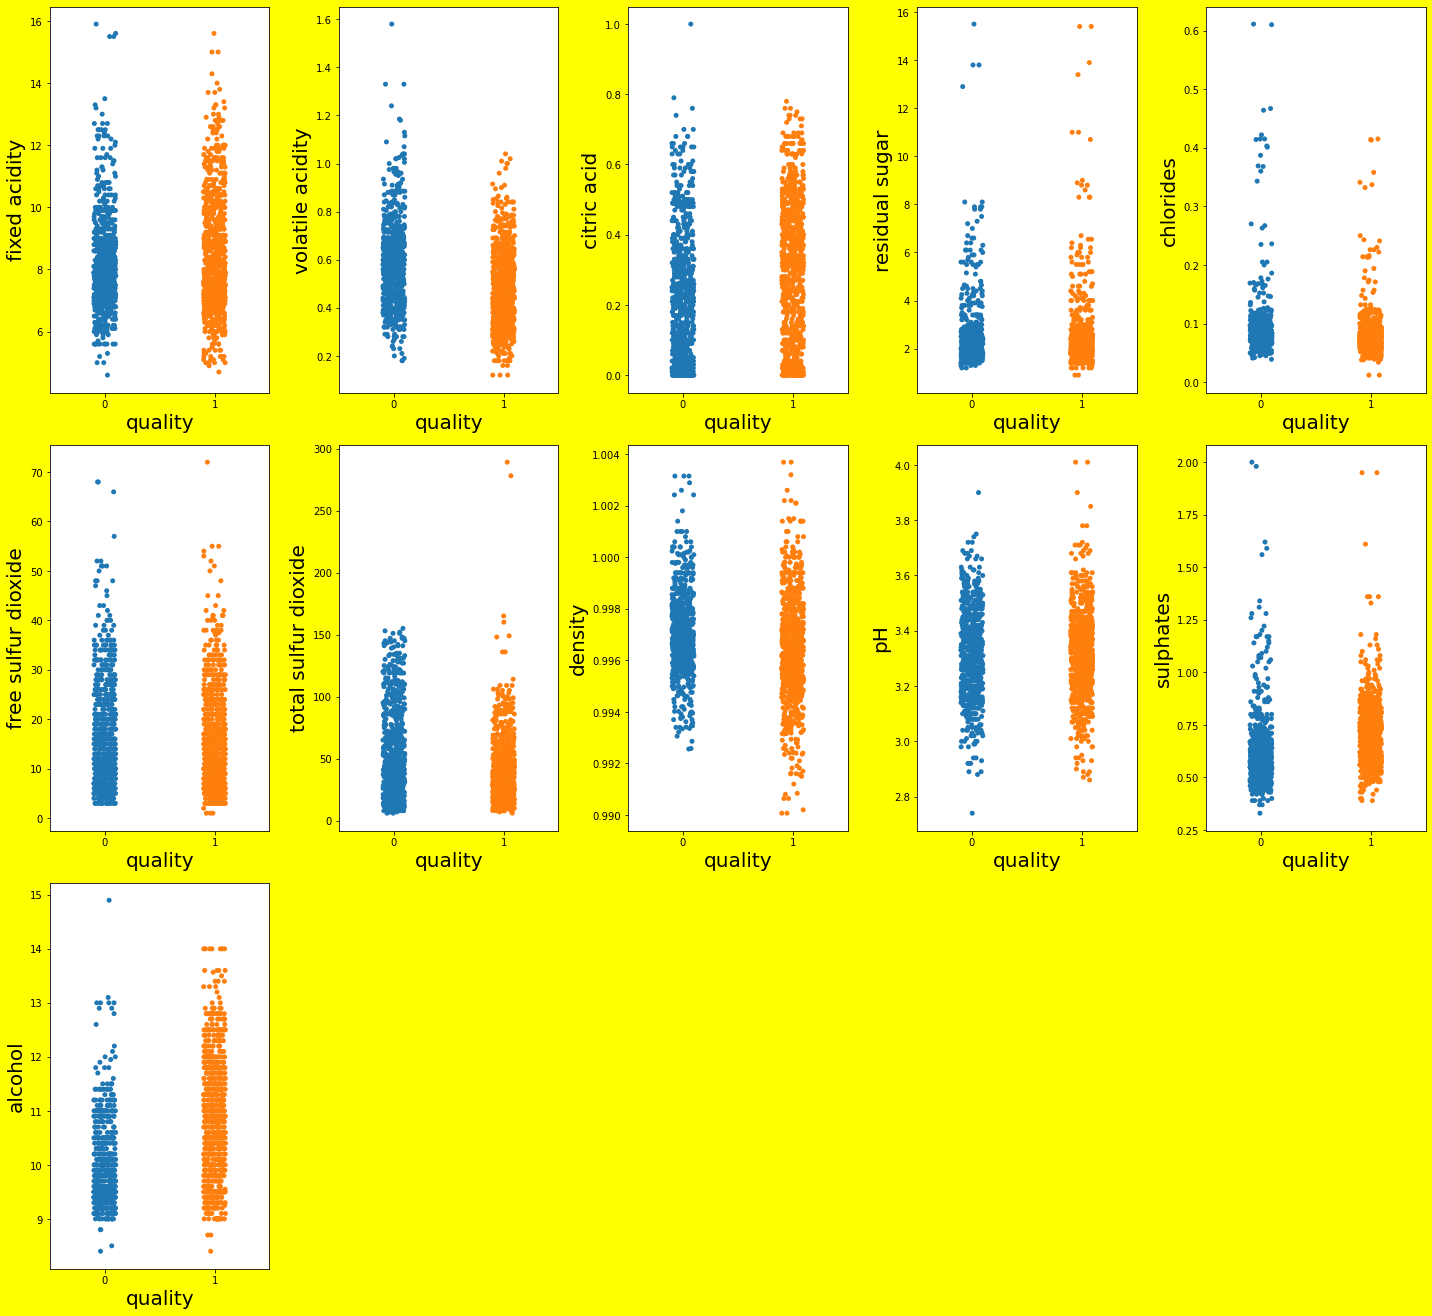

In [41]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,30), facecolor = 'yellow')
plotnum = 1

y = wine['quality']
for col in x:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('quality',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

-From the above graph it can understanable that "Alcohol" and "Volatile Acidity" are good indicators of wine quality, but "PH" and "Residual Sugar" do not help in clearly distinguishing good quality wine from subpar wine.

# Check for Outliers and skewness

In [42]:
# checking skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

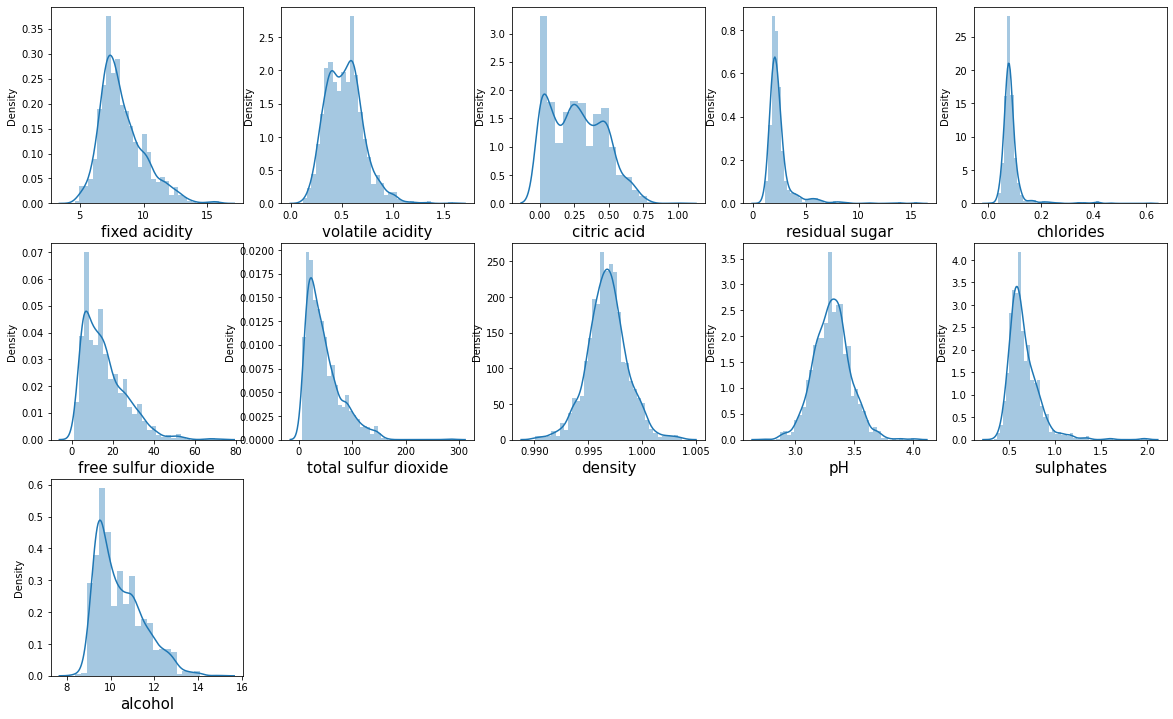

In [43]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

Sulphates, fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, alchohol are all right skewed distributions.


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

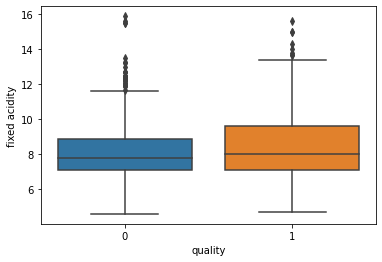

In [44]:
# Plot a boxplot to check for Outliers
# Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

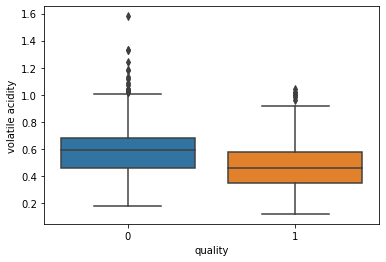

In [45]:
sns.boxplot('quality', 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

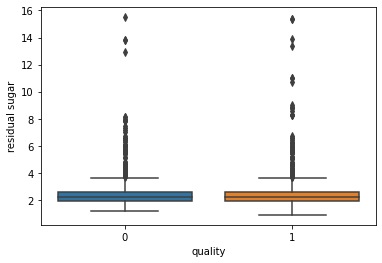

In [46]:
sns.boxplot('quality', 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

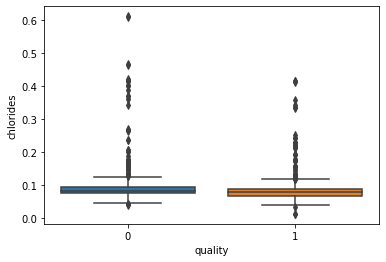

In [47]:
sns.boxplot('quality', 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

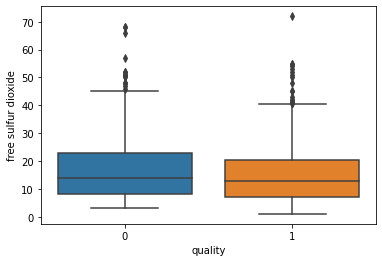

In [48]:
sns.boxplot('quality', 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

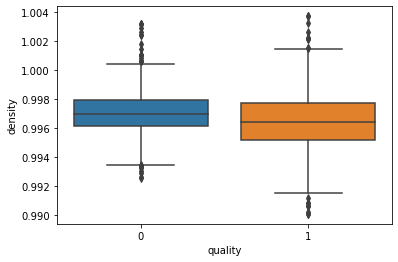

In [49]:
sns.boxplot('quality', 'density', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

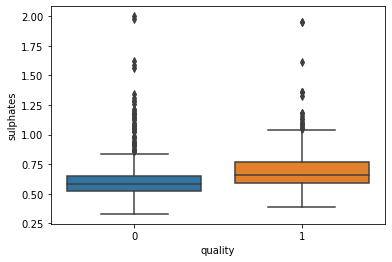

In [50]:
sns.boxplot('quality', 'sulphates', data = wine)

.boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening

.fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers

.volatile acididty - similar reasoning

.citric acid - seems to be somewhat uniformly distributed

.residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.

.chlorides - same as residual sugar. Min - 0.012, max - 0.611

.free sulfur dioxide, total suflur dioxide - same explanation as above

# Z score method to remove outliers

In [51]:
w= wine.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(w.shape)

(1458, 12)
(1599, 12)


In [52]:
# Checking the dataloss in %

loss = (1599-1458)/1599*100
loss

8.818011257035648

In [53]:
# Compare skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [54]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -0.159793
dtype: float64

In [55]:
# Reducing the skewness further
wine = df.copy()
feat = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

skewdf = wine[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [56]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = wine[feat].copy()
df1.skew()

fixed acidity           0.820879
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [57]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

fixed acidity           0.019079
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [58]:
skewdf.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [59]:
transformed.index = wine.index
wine[feat] = transformed[feat]
x = wine.drop(columns = ['quality'])
y = wine['quality']
x.skew()

fixed acidity           0.019079
volatile acidity        0.392097
citric acid             0.292600
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                 0.055543
pH                      0.113039
sulphates               0.021132
alcohol                 0.108436
dtype: float64

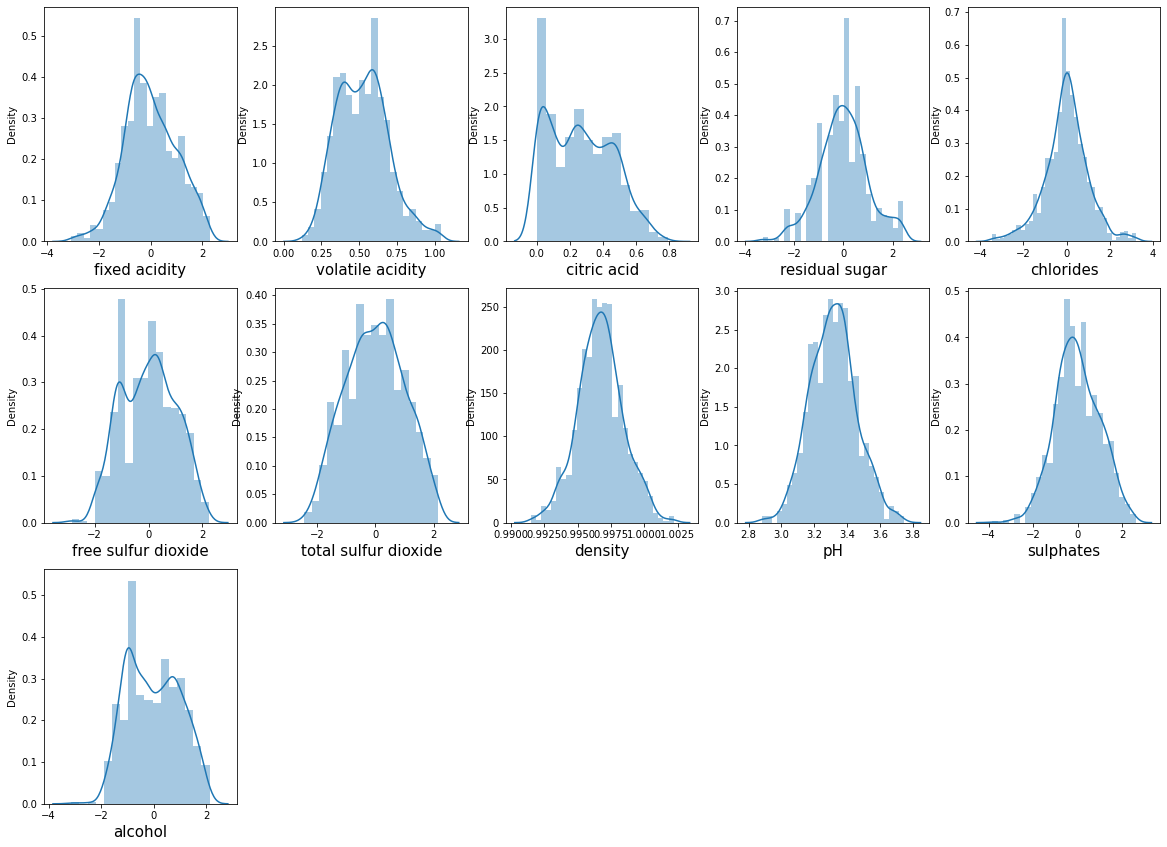

In [60]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

# Data Standardization

In [61]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.46910218,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.58823037, -1.11232895],
       [-0.17212704,  2.10132549, -1.38741253, ..., -0.82375195,
         0.45352708, -0.52685366],
       [-0.17212704,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.71401945, -0.75981623, ...,  1.80028837,
         0.66861292, -0.03320546],
       [-1.77310975, -1.26362959,  1.07067297, ...,  0.52372821,
         0.30109116,  0.7428399 ]])

In [62]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,fixed acidity,6.878090
1,volatile acidity,1.843893
2,citric acid,2.969303
3,residual sugar,1.687033
4,chlorides,1.264782
5,free sulfur dioxide,2.830927
6,total sulfur dioxide,3.159700
7,density,5.600673
8,pH,3.173526
9,sulphates,1.372701


# PCA (Principal component Analysis )

In [63]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

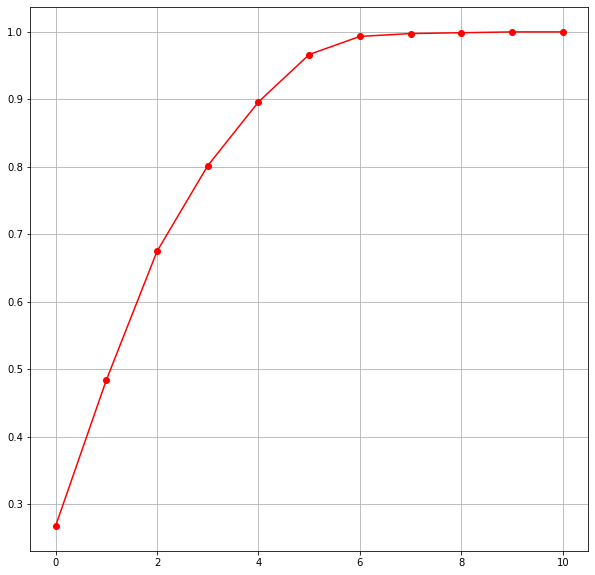

In [64]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

# AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data.


#we shall pick the first 8 components for our prediction.

In [65]:
# PCA with 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
x_new

array([[-0.19694243,  0.71791787,  1.24030223, ...,  0.43996057,
        -0.04106821, -0.19366463],
       [-1.68607426, -0.79832989, -0.18989896, ...,  0.16351266,
        -0.23245913, -0.38200569],
       [-0.87039798, -0.45864833,  0.24331083, ...,  0.21330711,
         0.14917114, -0.27524714],
       ...,
       [-0.86207684,  0.869296  , -1.51689074, ...,  0.08012323,
        -0.64149791,  0.04764785],
       [-1.33615204,  1.47507246, -0.81234096, ...,  0.28984494,
        -0.73473824,  0.01018267],
       [-0.48139881,  0.75591469, -1.47512032, ...,  0.94279727,
        -0.18526662,  0.4892006 ]])

# Kbest feature selection

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

In [67]:
xbest = x.drop(columns = ['pH','residual sugar','fixed acidity'])

In [68]:
scaled_x = sc.fit_transform(xbest)

# Finding the best Random State

# Train Test Split

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8429203539823009 on Random State: 11


In [71]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'xgboost'

# Data Modeling

# roceed with Modelling. We will use the following algorithms

Logistic Regression

Decision Trees

Naive Bayes

Random Forests

SVM

XGB

KNeighbour


In [72]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC = XGBClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

NameError: name 'XGBClassifier' is not defined

# Accuracy Score for each model

In [73]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
fit()
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [74]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [75]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [76]:
# XGB Classifier Model Accuracy
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)
conf_matrx = confusion_matrix(y_test,XGBCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NameError: name 'XGBC' is not defined

In [77]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NameError: name 'SV' is not defined

In [78]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

NameError: name 'KNN' is not defined

# Model Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())

#XGB Classifier
print("XGB Classifier:",cvs(XGBC,scaled_x,y,cv=5).mean())

# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.664607164713082
Logistic Regression: 0.7215412135762369
 Random Forest Classifier: 0.7119098055830155


NameError: name 'XGBC' is not defined

# ROC AUC Scores

In [80]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))

#XGB Classifier
print("XGB Classifier:",roc_auc_score(y_test,XGBCpred))

#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))

NameError: name 'DTCpred' is not defined

# ROC AUC Curves

In [81]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,XGBC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Logistic Regression

In [82]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,5,10,20],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

/Users/nidhinathkatiyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nidhinathkatiyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nidhinathkatiyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1358, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/Users/nidhinathkatiyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/nidhinathkatiyar/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 830, in _get_liblinear_solver_type
    

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 5, 10, 20],
                         'solver': ['liblinear']})

In [83]:
GridCV.best_params_

{'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [84]:
Best_mod2 = LogisticRegression(dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

71.91780821917808


In [85]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[139,  54],
       [ 69, 176]])

In [86]:
roc_auc_score(y_test,rfpred)

NameError: name 'rfpred' is not defined

In [87]:
roc_auc_score(y_test,lrpred)

0.719287300412393

# after comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and Logistic Regression Model, Random Forest Classifier Model is performing better.

# Random Forest Classifier also has better Confusion matrix performance than Logistic Regression

# Save the Model

In [88]:
import joblib
joblib.dump(Best_mod,"Best_Wine.pkl")

NameError: name 'Best_mod' is not defined

In [89]:
mod = joblib.load("Best_Wine.pkl")
print(mod.predict(x_test))

FileNotFoundError: [Errno 2] No such file or directory: 'Best_Wine.pkl'

In [90]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

NameError: name 'mod' is not defined